In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn


In [14]:
dataset = pd.read_csv('IBM.csv')

In [15]:
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [19]:
names = dataset.columns.values
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


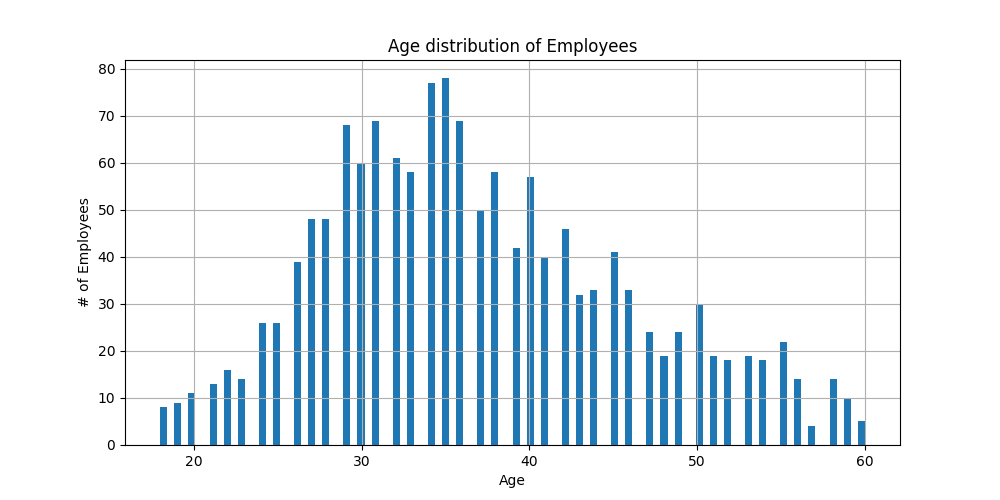

<Figure size 1000x500 with 0 Axes>

In [28]:
#histogram for age
plt.figure(figsize=(10,5))
dataset['Age'].hist(bins=100)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

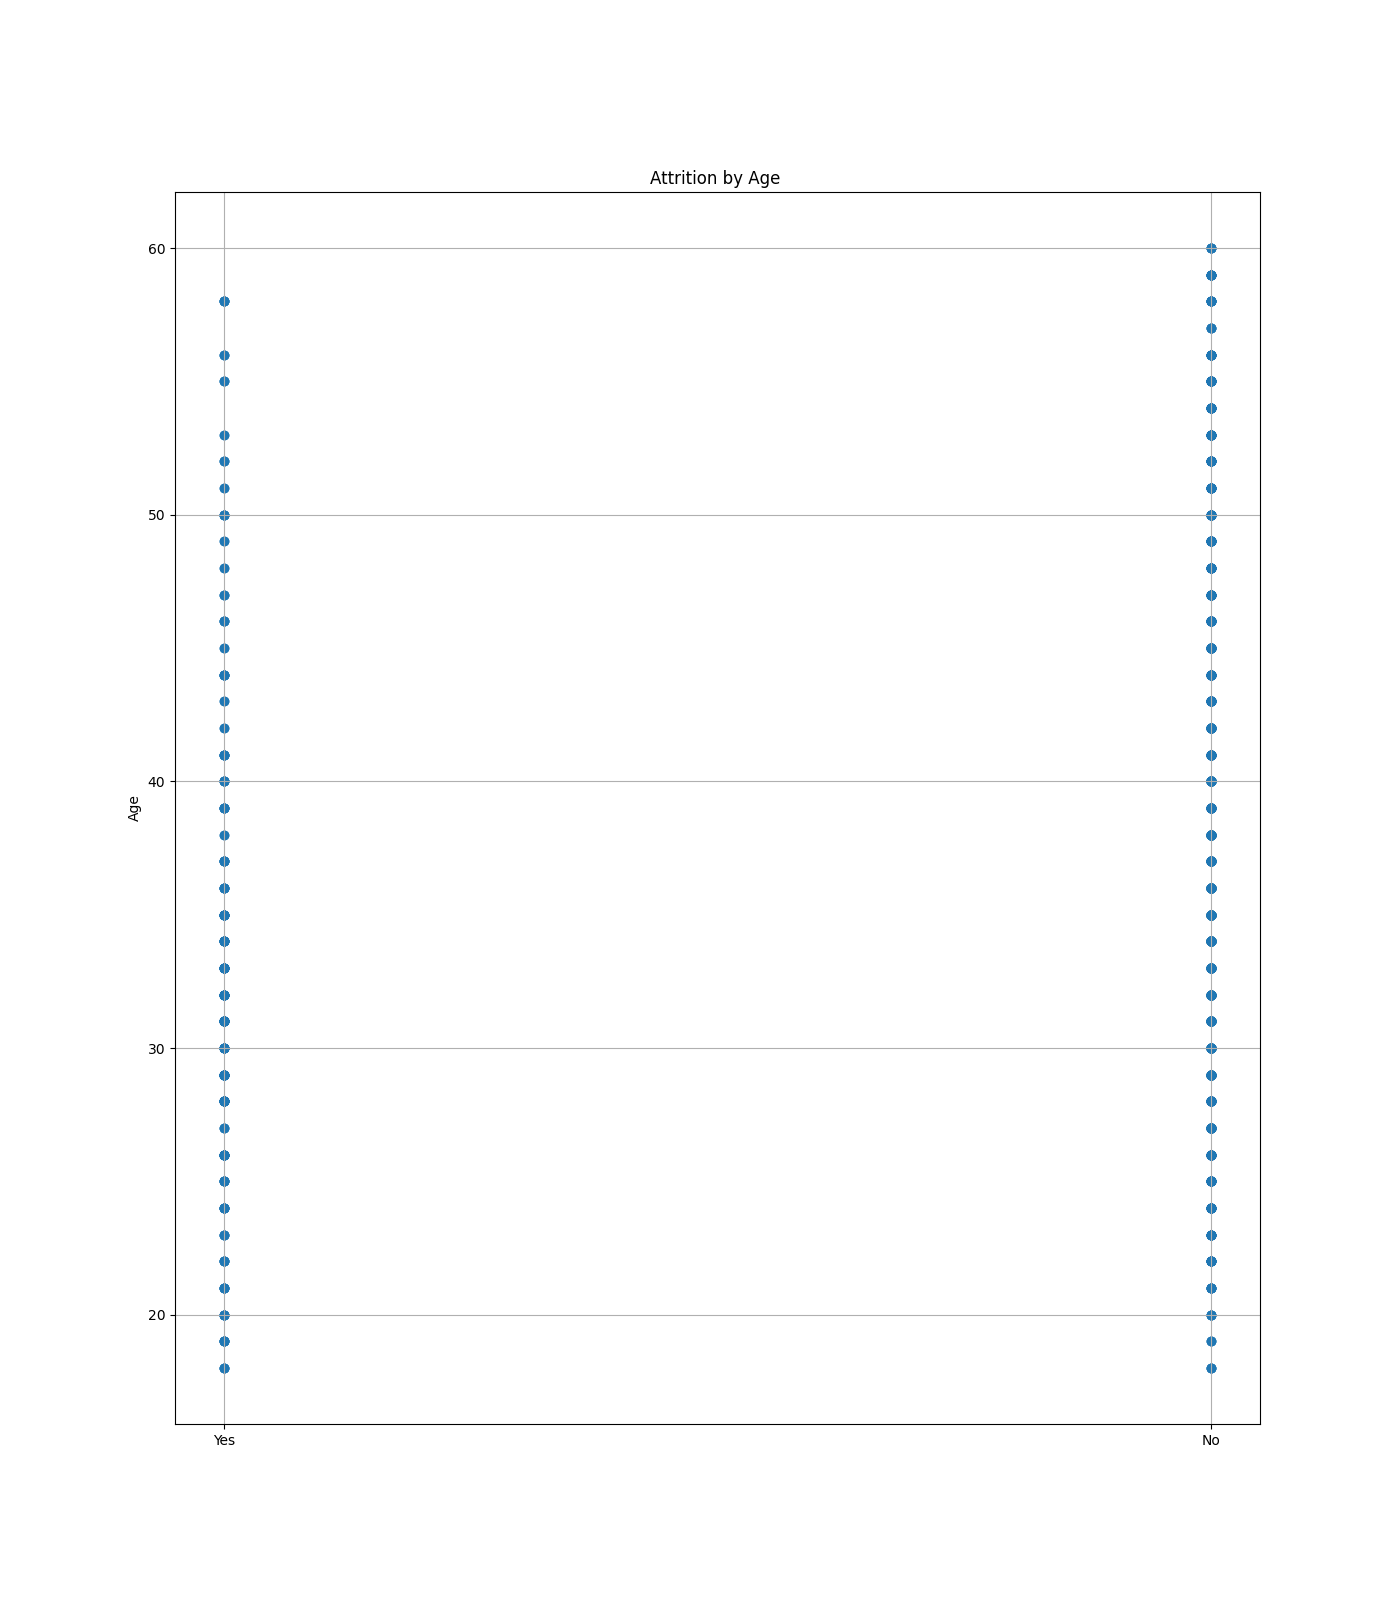

<Figure size 1400x1600 with 0 Axes>

In [74]:
plt.figure(figsize=(14,16))
plt.scatter(dataset.Attrition,dataset.Age)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(True)
plt.show()

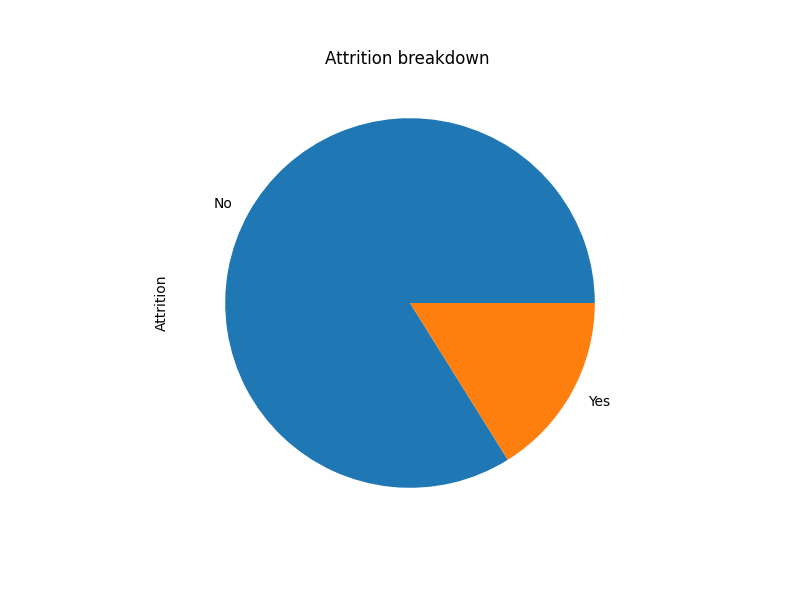

<Figure size 800x600 with 0 Axes>

In [68]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
dataset.Attrition.value_counts().plot(kind='pie')
plt.title("Attrition breakdown ")
plt.show()

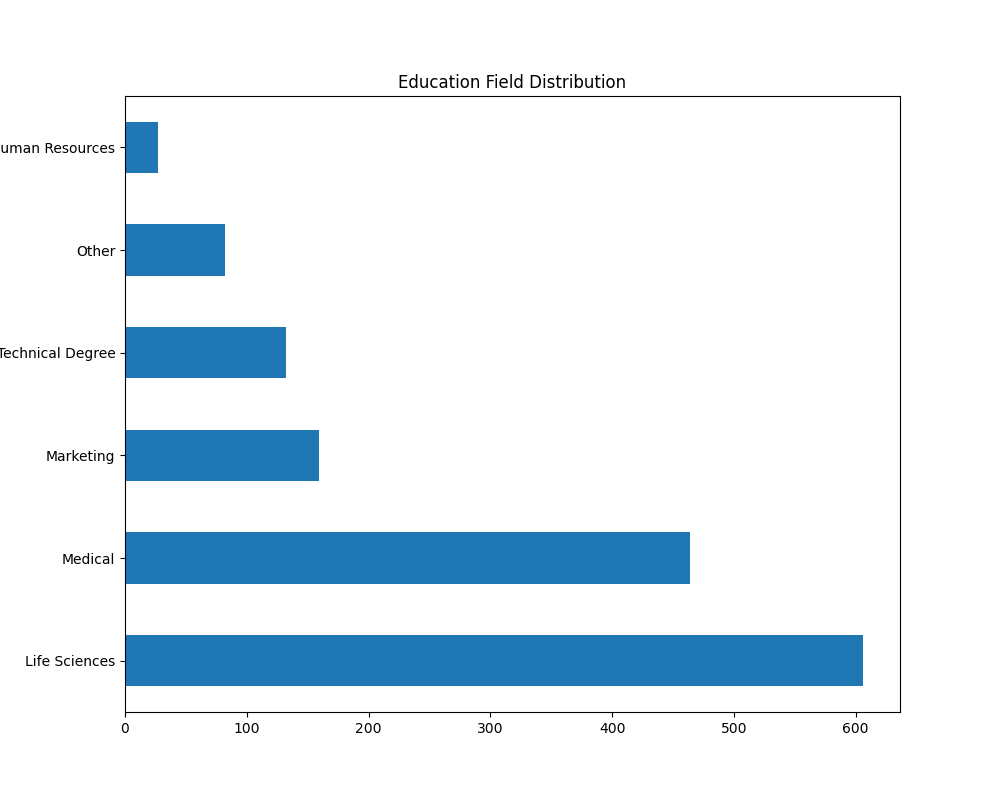

<Figure size 1000x800 with 0 Axes>

In [67]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
dataset.EducationField.value_counts().plot(kind='barh')
plt.title("Education Field Distribution")
plt.show()

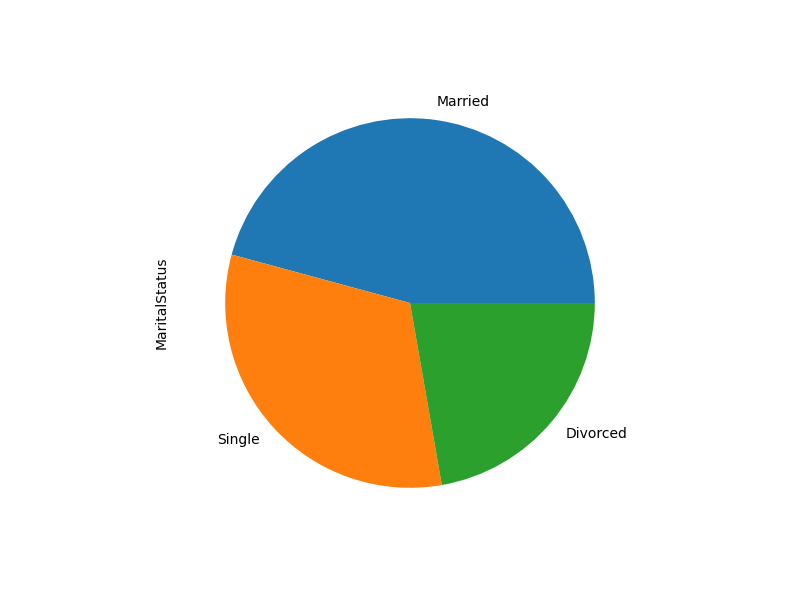

<Figure size 800x600 with 0 Axes>

In [60]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
dataset.MaritalStatus.value_counts().plot(kind='pie')
plt.show()

In [75]:
dataset.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 126.4+ KB


In [77]:
dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [78]:
dataset.std()

<ipython-input-78-d926424df4d9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [83]:
dataset['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [87]:
dataset['Attrition'].replace('Yes',1,inplace=True)
dataset['Attrition'].replace('No',0,inplace=True)

In [88]:
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [95]:
# building up a logistic regression model
dataset.drop('Attrition', axis=1)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [94]:
y = dataset['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [97]:
#conversion of all fields into numbers

dataset['EducationField'].replace('Life Sciences',1, inplace=True)
dataset['EducationField'].replace('Medical',2, inplace=True)
dataset['EducationField'].replace('Marketing', 3, inplace=True)
dataset['EducationField'].replace('Other',4, inplace=True)
dataset['EducationField'].replace('Technical Degree',5, inplace=True)
dataset['EducationField'].replace('Human Resources', 6, inplace=True)

In [98]:
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,1,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,1,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,4,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,1,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,2,1,2,Married,3468,9,3,2


In [99]:
dataset['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [100]:
dataset['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [101]:
dataset['Department'].replace('Research & Development',1, inplace=True)
dataset['Department'].replace('Sales',2, inplace=True)
dataset['Department'].replace('Human Resources', 3, inplace=True)

In [102]:
dataset['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [103]:
dataset['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [104]:
dataset['MaritalStatus'].replace('Married',1,inplace=True)
dataset['MaritalStatus'].replace('Single',2,inplace=True)
dataset['MaritalStatus'].replace('Divorced',3,inplace=True)

In [105]:
dataset['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [106]:
x=dataset.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [107]:
x.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [108]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [110]:
y=dataset['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [113]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataset, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [120]:
y = np.ravel(y)

In [121]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [122]:
y.mean()

0.16122448979591836

In [123]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [124]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [125]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179621 0.13820379]
 [0.80754592 0.19245408]
 [0.74123927 0.25876073]
 [0.83441339 0.16558661]
 [0.73499934 0.26500066]
 [0.79097739 0.20902261]
 [0.85615195 0.14384805]
 [0.85699668 0.14300332]
 [0.96699058 0.03300942]
 [0.93685211 0.06314789]
 [0.9509928  0.0490072 ]
 [0.83101549 0.16898451]
 [0.86296557 0.13703443]
 [0.86581193 0.13418807]
 [0.88750605 0.11249395]
 [0.88892616 0.11107384]
 [0.88569728 0.11430272]
 [0.78516582 0.21483418]
 [0.7979449  0.2020551 ]
 [0.88511306 0.11488694]
 [0.70651585 0.29348415]
 [0.94676695 0.05323305]
 [0.86736253 0.13263747]
 [0.84276451 0.15723549]
 [0.60336829 0.39663171]
 [0.811292   0.188708  ]
 [0.91813732 0.08186268]
 [0.93285522 0.06714478]
 [0.68230746 0.31769254]
 [0.8702714  0.1297286 ]
 [0.87266387 0.12733613]
 [0.76968736 0.23031264]
 [0.86435777 0.13564223]
 [0.95758882 0.04241118]
 [0.84461487 0.15538513]
 [0.86719349 0.13280651]
 [0.90465984 0.09534016]
 [0.68936421 0.31063579]
 [0.90703619 0.09296381]
 [0.80663473 0.19336527]


In [126]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [127]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [128]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [138]:
kk=[[1.0, 25.0, 1.0, 500.0, 1.0, 24.0, 1.0]]
print(model.predict_proba(kk))

#you can change the values in kk and add according to the values and you can find the probability of attrituion of employee

/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[6.95829659e-07 9.99999304e-01]]


In [141]:
kk=[[1.0, 25.0, 1.0, 10.0, 1.0, 24.0, 1.0]]
print(model.predict_proba(kk))

/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[0.22100616 0.77899384]]
